# FIRST code

## Pre-processing

In [9]:
import rasterio
from rasterio.warp import reproject, Resampling
import numpy as np
import os
from rasterio.windows import Window

# Define directories
base_dir = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET"
output_dir = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT"
os.makedirs(f"{output_dir}/train/images", exist_ok=True)
os.makedirs(f"{output_dir}/train/masks", exist_ok=True)
os.makedirs(f"{output_dir}/val/images", exist_ok=True)
os.makedirs(f"{output_dir}/val/masks", exist_ok=True)

# List of tile pairs (ESA path, S2 path)
tile_pairs = [

    # INDIA

        (f"{base_dir}/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N21E072_Map.tif",
         f"{base_dir}/S2_images/India/Vad_lake_1 [ INDIA ].tif"),  # Vadodara

        # Mumbai / Pune
        (f"{base_dir}/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N18E072_Map.tif",
         f"{base_dir}/S2_images/India/Maharashtra/Mumbai/Mum [ INDIA ].tif"),
        (f"{base_dir}/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N18E072_Map.tif",
         f"{base_dir}/S2_images/India/Maharashtra/Pune/PUNE [ INDIA ].tif"),

        # Delhi
        (f"{base_dir}/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N27E075_Map.tif",
         f"{base_dir}/S2_images/India/Delhi/Delhi.tif"),

        # Jodhpur
        (f"{base_dir}/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N24E072_Map.tif",
         f"{base_dir}/S2_images/India/Rajsthan/Jodhpur [ INDIA ].tif"),  # Jodhpur

        # Rameshwaram, Pondicherry
        (f"{base_dir}/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N09E078_Map.tif",
         f"{base_dir}/S2_images/India/Tn/Pondicherry/OUTPUT.tif"),  # Pondicherry
        (f"{base_dir}/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N09E078_Map.tif",
         f"{base_dir}/S2_images/India/Tn/Rameshwaram/RAM [ INDIA ].tif"),  # Rameshwaram

        # Kolkata, Sundarban
        (f"{base_dir}/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N21E087_Map.tif",
         f"{base_dir}/S2_images/India/WB/KOL  [ INDIA ].tif"),  # Kolkata
        (f"{base_dir}/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N21E087_Map.tif",
         f"{base_dir}/S2_images/India/WB/SUN [ INDIA ].tif"),  # Sunderban

        #Tapi River
        (f"{base_dir}/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N21E072_Map.tif",
         f"{base_dir}/S2_images/India/Tapi River/TR.tif"),

    # AUSTRALIA

        (f"{base_dir}/ESA/AUSTRALIA/ESA_WorldCover_10m_2021_V200_S30E144_Map.tif",
         f"{base_dir}/S2_images/Australia/Aus_lake [ AUSTRALIA ].tif"),  # NSW
        (f"{base_dir}/ESA/AUSTRALIA/ESA_WorldCover_10m_2021_V200_S30E135_Map.tif",
         f"{base_dir}/S2_images/Australia/Kathi Thanda Lake Eyre/KTLE.tif"),  # KATHI THANDA LAKE

        # Sydney
        (f"{base_dir}/ESA/AUSTRALIA_SOUTH/ESA_WorldCover_10m_2021_V200_S36E150_Map.tif",
         f"{base_dir}/S2_images/Australia/SYDNEY [ AUSTRALIA ].tif"),

        # Melbourne
        (f"{base_dir}/ESA/AUSTRNALIA_SOUTH/ESA_WorldCover_10m_2021_V200_S39E144_Map.tif",
         f"{base_dir}/S2_images/Australia/Melbourne/M_TOP_L.tif"),
        (f"{base_dir}/ESA/AUSTRALIA_SOUTH/ESA_WorldCover_10m_2021_V200_S39E144_Map.tif",
         f"{base_dir}/S2_images/Australia/Melbourne/M_TOP_R.tif"),

        # Lake Gairdner
        (f"{base_dir}/ESA/AUSTRALIA_SOUTH/ESA_WorldCover_10m_2021_V200_S33E135_Map.tif",
         f"{base_dir}/S2_images/Australia/Lake Gairdner/LG_TOP_L.tif"),
        (f"{base_dir}/ESA/AUSTRALIA_SOUTH/ESA_WorldCover_10m_2021_V200_S33E135_Map.tif",
         f"{base_dir}/S2_images/Australia/Lake Gairdner/LG_TOP_R.tif"),

        # Jindabyne
        (f"{base_dir}/ESA/AUSTRALIA_SOUTH/ESA_WorldCover_10m_2021_V200_S39E147_Map.tif",
         f"{base_dir}/S2_images/Australia/Jindabyne/J.tif"),

        # Port Welshpool
        (f"{base_dir}/ESA/AUSTRALIA_SOUTH/ESA_WorldCover_10m_2021_V200_S39E144_Map.tif",
         f"{base_dir}/S2_images/Australia/Port Welshpool/PW.tif"),

        #Farm
        (f"{base_dir}/ESA/AUSTRALIA_SOUTH_L/ESA_WorldCover_10m_2021_V200_S36E117_Map.tif",
         f"{base_dir}/S2_images/Australia/Farm/F.tif"),

        #Brisbane
        (f"{base_dir}/ESA/AUSTRALIA/ESA_WorldCover_10m_2021_V200_S30E150_Map.tif",
         f"{base_dir}/S2_images/Australia/Brisbane/Brisbane.tif"),
]

def preprocess_tile(mask_path, image_path, output_dir, tile_size=128, region_size=1830):
    with rasterio.open(image_path) as src_img:
        img = src_img.read()
        img_profile = src_img.profile
        if img.shape[1] > region_size or img.shape[2] > region_size:
            window = Window(0, 0, region_size, region_size)
            img = src_img.read(window=window)
            img_profile.update(height=region_size, width=region_size, transform=src_img.window_transform(window))

    with rasterio.open(mask_path) as src_mask:
        mask = src_mask.read(1)
        mask_clipped = np.zeros((region_size, region_size), dtype=np.uint8)
        reproject(
            mask, mask_clipped,
            src_transform=src_mask.transform,
            src_crs=src_mask.crs,
            dst_transform=img_profile["transform"],
            dst_crs=img_profile["crs"],
            resampling=Resampling.nearest
        )

    # Reclassify mask to 4 classes
    new_mask = np.zeros_like(mask_clipped, dtype=np.uint8)
    new_mask[np.isin(mask_clipped, [10, 20, 30, 40])] = 1  # Vegetation
    new_mask[mask_clipped == 80] = 2  # Water
    new_mask[mask_clipped == 50] = 3  # Built-up

    # Tile into 64x64 patches
    h, w = img.shape[1], img.shape[2]
    for i in range(0, h - tile_size + 1, tile_size):
        for j in range(0, w - tile_size + 1, tile_size):
            window = Window(j, i, tile_size, tile_size)
            img_patch = img[:, i:i+tile_size, j:j+tile_size]
            mask_patch = new_mask[i:i+tile_size, j:j+tile_size]
            patch_profile = img_profile.copy()
            patch_profile.update(height=tile_size, width=tile_size, count=13,
                               transform=rasterio.windows.transform(window, img_profile["transform"]))
            split = "train" if np.random.rand() < 0.8 else "val"
            with rasterio.open(f"{output_dir}/{split}/images/img_{os.path.basename(mask_path)}_{i}_{j}_{os.path.basename(image_path)}.tif", "w", **patch_profile) as dst:
                dst.write(img_patch)
            mask_patch_profile = patch_profile.copy()
            mask_patch_profile.update(count=1, dtype=np.uint8)
            with rasterio.open(f"{output_dir}/{split}/masks/mask_{os.path.basename(mask_path)}_{i}_{j}_{os.path.basename(image_path)}.tif", "w", **mask_patch_profile) as dst:
                dst.write(mask_patch[np.newaxis, :])

# Process tiles
for mask_path, image_path in tile_pairs:
    preprocess_tile(mask_path, image_path, output_dir)

print("Preprocessing complete!")

Preprocessing complete!


## Training the U-NET

In [10]:
print("Train images:", len(os.listdir(f"{output_dir}/train/images")))
print("Train masks:", len(os.listdir(f"{output_dir}/train/masks")))
print("Val images:", len(os.listdir(f"{output_dir}/val/images")))
print("Val masks:", len(os.listdir(f"{output_dir}/val/masks")))
for mask_path in os.listdir(f"{output_dir}/train/masks"):
    if "Mum" in mask_path:
        with rasterio.open(f"{output_dir}/train/masks/{mask_path}") as src:
            mask = src.read(1)
            unique, counts = np.unique(mask, return_counts=True)
            print(f"Mumbai patch {mask_path}: {dict(zip(unique, counts))}")

Train images: 9746
Train masks: 9746
Val images: 3602
Val masks: 3602
Mumbai patch mask_ESA_WorldCover_10m_2021_V200_N18E072_Map.tif_0_0_Mum [ INDIA ].tif.tif: {np.uint8(0): np.int64(16384)}
Mumbai patch mask_ESA_WorldCover_10m_2021_V200_N18E072_Map.tif_0_0_Mum [ INDIA ].tif_0.tif: {np.uint8(0): np.int64(16384)}
Mumbai patch mask_ESA_WorldCover_10m_2021_V200_N18E072_Map.tif_0_1024_Mum [ INDIA ].tif.tif: {np.uint8(0): np.int64(30), np.uint8(1): np.int64(16024), np.uint8(2): np.int64(5), np.uint8(3): np.int64(325)}
Mumbai patch mask_ESA_WorldCover_10m_2021_V200_N18E072_Map.tif_0_1152_Mum [ INDIA ].tif.tif: {np.uint8(0): np.int64(17), np.uint8(1): np.int64(16185), np.uint8(2): np.int64(172), np.uint8(3): np.int64(10)}
Mumbai patch mask_ESA_WorldCover_10m_2021_V200_N18E072_Map.tif_0_1280_Mum [ INDIA ].tif.tif: {np.uint8(0): np.int64(12), np.uint8(1): np.int64(16215), np.uint8(2): np.int64(136), np.uint8(3): np.int64(21)}
Mumbai patch mask_ESA_WorldCover_10m_2021_V200_N18E072_Map.tif_0_128_

### This code used TILE PAIRS

In [3]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import csv
import os
import rasterio

class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = [f"{image_dir}/{f}" for f in os.listdir(image_dir) if f.endswith(".tif")]
        self.mask_paths = [f"{mask_dir}/{f}" for f in os.listdir(mask_dir) if f.endswith(".tif")]

    def __len__(self): return len(self.image_paths)

    def __getitem__(self, idx):
        with rasterio.open(self.image_paths[idx]) as src:
            img = src.read() / 10000.0
            img = np.clip(img, 0, 1)
        with rasterio.open(self.mask_paths[idx]) as src:
            mask = src.read(1)
        img, mask = torch.tensor(img, dtype=torch.float32), torch.tensor(mask, dtype=torch.long)
        if np.random.rand() > 0.5:
            img, mask = torch.flip(img, [2]), torch.flip(mask, [1])
        if np.random.rand() > 0.5:
            img, mask = torch.flip(img, [1]), torch.flip(mask, [0])
        return img, mask

class UNet(nn.Module):
    def __init__(self, input_channels=13, num_classes=4):
        super(UNet, self).__init__()
        def conv_block(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_channels, out_channels, 3, padding=1),
                nn.ReLU(inplace=True)
            )
        def upsample_block(in_channels, out_channels):
            return nn.ConvTranspose2d(in_channels, out_channels, 2, stride=2)
        self.conv1 = conv_block(input_channels, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = conv_block(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = conv_block(128, 256)
        self.pool3 = nn.MaxPool2d(2)
        self.conv4 = conv_block(256, 512)
        self.up5 = upsample_block(512, 256)
        self.conv5 = conv_block(512, 256)
        self.up6 = upsample_block(256, 128)
        self.conv6 = conv_block(256, 128)
        self.up7 = upsample_block(128, 64)
        self.conv7 = conv_block(128, 64)
        self.final_conv = nn.Conv2d(64, num_classes, 1)

    def forward(self, x):
        x1 = self.conv1(x)
        p1 = self.pool1(x1)
        x2 = self.conv2(p1)
        p2 = self.pool2(x2)
        x3 = self.conv3(p2)
        p3 = self.pool3(x3)
        x4 = self.conv4(p3)
        u5 = self.up5(x4)
        x5 = torch.cat([u5, x3], dim=1)
        x5 = self.conv5(x5)
        u6 = self.up6(x5)
        x6 = torch.cat([u6, x2], dim=1)
        x6 = self.conv6(x6)
        u7 = self.up7(x6)
        x7 = torch.cat([u7, x1], dim=1)
        x7 = self.conv7(x7)
        return self.final_conv(x7)

In [22]:
# Load datasets
output_dir = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT"
train_dataset = SegmentationDataset(f"{output_dir}/train/images", f"{output_dir}/train/masks")
val_dataset = SegmentationDataset(f"{output_dir}/val/images", f"{output_dir}/val/masks")
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Training setup
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = UNet(input_channels=13, num_classes=4).to(device)
model.load_state_dict(torch.load("unet_india_aus_expanded.pth"))

tile_pairs = [ # Fill in your paths
    ("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N21E072_Map.tif", "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/India/Vad_lake_1 [ INDIA ].tif"),
    ("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/ESA/AUSSUNSUNSUNALIA/ESA_WorldCover_10m_2021_V200_S30E144_Map.tif", "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/Australia/Aus_lake [ AUSSUNSUNSUNALIA ].tif"),
    ("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N21E072_Map.tif", "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/India/Maharashtra/Mumbai/Mum [ INDIA ].tif"),
    ("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N21E072_Map.tif", "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/India/Maharashtra/Pune/PUNE [ INDIA ].tif"),
    ("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N21E087_Map.tif", "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/India/WB/KOL  [ INDIA ].tif"),
    ("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N21E087_Map.tif", "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/India/WB/SUN [ INDIA ].tif"),
    ("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N09E078_Map.tif", "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/India/Tn/Pondicherry/OUTPUT.tif"),
    ("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/ESA/INDIA/ESA_WorldCover_10m_2021_V200_N09E078_Map.tif", "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/India/Tn/Rameshwaram/RAM [ INDIA ].tif"),
]

class_counts = np.zeros(4)
for mask_path, _ in tile_pairs:
    with rasterio.open(mask_path) as src:
        mask = src.read(1)
        mask_reclass = np.zeros_like(mask, dtype=np.uint8)
        mask_reclass[np.isin(mask, [10, 20, 30, 40])] = 1
        mask_reclass[mask == 80] = 2
        mask_reclass[mask == 50] = 3
        for i in range(4):
            class_counts[i] += np.sum(mask_reclass == i)
class_weights = 1.0 / (class_counts + 1e-6)
class_weights /= class_weights.sum()
class_weights[3] *= 3  # Triple Built-up
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# CSV logging
csv_file = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/training_metrics_4.csv"
header = ["Epoch", "Train Loss", "Train Acc", "Train F1", "Train F1_0", "Train F1_1", "Train F1_2", "Train F1_3", "Train IoU",
          "Val Loss", "Val Acc", "Val F1", "Val F1_0", "Val F1_1", "Val F1_2", "Val F1_3", "Val IoU", "LR"]
with open(csv_file, mode='w', newline='') as f:
    csv.writer(f).writerow(header)

def compute_iou(pred, target, num_classes):
    iou_per_class = []
    pred, target = pred.flatten(), target.flatten()
    for cls in range(num_classes):
        pred_cls = (pred == cls).astype(np.uint8)
        target_cls = (target == cls).astype(np.uint8)
        intersection = np.sum(pred_cls * target_cls)
        union = np.sum(pred_cls) + np.sum(target_cls) - intersection
        iou_per_class.append(intersection / union if union > 0 else np.nan)
    return np.nanmean(iou_per_class)

def compute_per_class_f1(pred, target, num_classes):
    pred, target = pred.flatten(), target.flatten()
    return f1_score(target, pred, average=None, zero_division=0, labels=range(num_classes))

num_epochs = 50
best_val_f1_3 = 0
best_model_path = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/best_unet_india_aus.pth"
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_preds, train_targets = [], []
    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        train_preds.extend(preds.flatten())
        train_targets.extend(masks.cpu().numpy().flatten())

    train_loss /= len(train_loader)
    train_acc = accuracy_score(train_targets, train_preds)
    train_f1 = f1_score(train_targets, train_preds, average='macro', zero_division=0)
    train_f1_per_class = compute_per_class_f1(np.array(train_preds), np.array(train_targets), 4)
    train_iou = compute_iou(np.array(train_preds), np.array(train_targets), 4)

    model.eval()
    val_loss = 0
    val_preds, val_targets = [], []
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            val_loss += criterion(outputs, masks).item()
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            val_preds.extend(preds.flatten())
            val_targets.extend(masks.cpu().numpy().flatten())

    val_loss /= len(val_loader)
    val_acc = accuracy_score(val_targets, val_preds)
    val_f1 = f1_score(val_targets, val_preds, average='macro', zero_division=0)
    val_f1_per_class = compute_per_class_f1(np.array(val_preds), np.array(val_targets), 4)
    val_iou = compute_iou(np.array(val_preds), np.array(val_targets), 4)

    scheduler.step(val_loss)
    current_lr = scheduler.get_last_lr()[0]
    if val_f1_per_class[3] > best_val_f1_3:
        best_val_f1_3 = val_f1_per_class[3]
        torch.save(model.state_dict(), best_model_path)
        print(f"Saved best model with Val F1_3: {best_val_f1_3:.4f}")

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}, IoU: {train_iou:.4f}")
    print(f"Train F1 per class: {train_f1_per_class}")
    print(f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, F1: {val_f1:.4f}, IoU: {val_iou:.4f}")
    print(f"Val F1 per class: {val_f1_per_class}")
    print(f"Learning Rate: {current_lr:.6f}")
    with open(csv_file, mode='a', newline='') as f:
        csv.writer(f).writerow([epoch + 1, f"{train_loss:.4f}", f"{train_acc:.4f}", f"{train_f1:.4f}",
                                f"{train_f1_per_class[0]:.4f}", f"{train_f1_per_class[1]:.4f}", f"{train_f1_per_class[2]:.4f}", f"{train_f1_per_class[3]:.4f}", f"{train_iou:.4f}",
                                f"{val_loss:.4f}", f"{val_acc:.4f}", f"{val_f1:.4f}",
                                f"{val_f1_per_class[0]:.4f}", f"{val_f1_per_class[1]:.4f}", f"{val_f1_per_class[2]:.4f}", f"{val_f1_per_class[3]:.4f}", f"{val_iou:.4f}", f"{current_lr:.6f}"])

torch.save(model.state_dict(), "unet_india_aus_expanded.pth")
print("Training complete!")

## Finding the ESA tile

In [2]:
import rasterio

# Open Sentinel image
image_path = 'D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/Australia/Melbourne/M_TOP_L/M_TOP_L.tif'
with rasterio.open(image_path) as src:
    print("CRS:", src.crs)  # Print the coordinate reference system
    print("Bounds:", src.bounds)  # Print the bounds

CRS: EPSG:32755
Bounds: BoundingBox(left=199980.0, bottom=5790220.0, right=309780.0, top=5900020.0)


In [113]:
import rasterio
try:
    with rasterio.open(f"{img_dir}/Mum [ INDIA ].tif") as src:
        print(f"Image size: {src.width}x{src.height}, bands: {src.count}")
except Exception as e:
    print(f"Error opening image: {e}")

Image size: 1830x1830, bands: 13


In [18]:
import rasterio
from rasterio.warp import transform_bounds
import math

# Open Sentinel image
image_path = 'D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/Australia/Brisbane/Brisbane.tif'
with rasterio.open(image_path) as src:
    # Get the CRS and bounds
    src_crs = src.crs
    bounds = src.bounds  # (left, bottom, right, top) in source CRS
    print(f"Source CRS: {src_crs}")
    print(f"Source Bounds: {bounds}")

    # Transform bounds to EPSG:4326
    dst_crs = 'EPSG:4326'
    left, bottom, right, top = transform_bounds(src_crs, dst_crs, *bounds)
    print(f"Bounds in EPSG:4326: (left: {left}, bottom: {bottom}, right: {right}, top: {top})")

    # Calculate ESA tile
    tile_lat = math.floor(bottom / 3) * 3  # Bottom-left latitude
    tile_lon = math.floor(left / 3) * 3    # Bottom-left longitude
    tile_name = f"S{abs(tile_lat):02d}E{tile_lon:03d}" if tile_lat < 0 else f"N{tile_lat:02d}E{tile_lon:03d}"
    print(f"ESA WorldCover Tile: {tile_name}")

Source CRS: EPSG:32756
Source Bounds: BoundingBox(left=399960.0, bottom=6890200.0, right=509760.0, top=7000000.0)
Bounds in EPSG:4326: (left: 151.98152668679356, bottom: -28.113721588371305, right: 153.09936960549254, top: -27.118842927048398)
ESA WorldCover Tile: S30E150


In [16]:
output_dir = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT"
print("Train images:", len(os.listdir(f"{output_dir}/train/images")))
print("Train masks:", len(os.listdir(f"{output_dir}/train/masks")))
class_counts = np.zeros(4)
for mask_path in os.listdir(f"{output_dir}/train/masks"):
    with rasterio.open(f"{output_dir}/train/masks/{mask_path}") as src:
        mask = src.read(1)
        for i in range(4):
            class_counts[i] += np.sum(mask == i)
print("Class counts:", class_counts)
print("Class ratios:", class_counts / class_counts.sum())

Train images: 3169
Train masks: 3169
Class counts: [14496556. 31870472.  4643728.   910140.]
Class ratios: [0.27920466 0.61382747 0.08943852 0.01752936]


## NDVI

In [5]:
import rasterio
import torch
import numpy as np
from torch.nn import Module
import logging
import os

img_dir = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/India/Maharashtra/Mumbai/"
out_dir = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/NDVI_OUT/INDIA/MUM_NEW"

# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler(f"{out_dir}/inference_log.txt"),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger()

# CUDA diagnostics
logger.info(f"PyTorch version: {torch.__version__}")
logger.info(f"CUDA available: {torch.cuda.is_available()}")
logger.info(f"CUDA version: {torch.version.cuda}")
logger.info(f"GPU count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    logger.info(f"GPU name: {torch.cuda.get_device_name(0)}")
else:
    logger.warning("CUDA not available, falling back to CPU")

class UNet(Module):
    def __init__(self, input_channels=13, num_classes=4):
        super(UNet, self).__init__()
        def conv_block(in_channels, out_channels):
            return torch.nn.Sequential(
                torch.nn.Conv2d(in_channels, out_channels, 3, padding=1),
                torch.nn.ReLU(inplace=True),
                torch.nn.Conv2d(out_channels, out_channels, 3, padding=1),
                torch.nn.ReLU(inplace=True)
            )
        def upsample_block(in_channels, out_channels):
            return torch.nn.ConvTranspose2d(in_channels, out_channels, 2, stride=2)
        self.conv1 = conv_block(input_channels, 64)
        self.pool1 = torch.nn.MaxPool2d(2)
        self.conv2 = conv_block(64, 128)
        self.pool2 = torch.nn.MaxPool2d(2)
        self.conv3 = conv_block(128, 256)
        self.pool3 = torch.nn.MaxPool2d(2)
        self.conv4 = conv_block(256, 512)
        self.pool4 = torch.nn.MaxPool2d(2)
        self.conv5 = conv_block(512, 1024)
        self.up6 = upsample_block(1024, 512)
        self.conv6 = conv_block(1024, 512)
        self.up7 = upsample_block(512, 256)
        self.conv7 = conv_block(512, 256)
        self.up8 = upsample_block(256, 128)
        self.conv8 = conv_block(256, 128)
        self.up9 = upsample_block(128, 64)
        self.conv9 = conv_block(128, 64)
        self.final_conv = torch.nn.Conv2d(64, num_classes, 1)

    def forward(self, x):
        x1 = self.conv1(x)
        p1 = self.pool1(x1)
        x2 = self.conv2(p1)
        p2 = self.pool2(x2)
        x3 = self.conv3(p2)
        p3 = self.pool3(x3)
        x4 = self.conv4(p3)
        p4 = self.pool4(x4)
        x5 = self.conv5(p4)
        u6 = self.up6(x5)
        x6 = torch.cat([u6, x4], dim=1)
        x6 = self.conv6(x6)
        u7 = self.up7(x6)
        x7 = torch.cat([u7, x3], dim=1)
        x7 = self.conv7(x7)
        u8 = self.up8(x7)
        x8 = torch.cat([u8, x2], dim=1)
        x8 = self.conv8(x8)
        u9 = self.up9(x8)
        x9 = torch.cat([u9, x1], dim=1)
        x9 = self.conv9(x9)
        return self.final_conv(x9)

# Segmentation
try:
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    logger.info(f"Using device: {device}")
    model = UNet(input_channels=13, num_classes=4).to(device)
    model_path = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/CODE/ESA/unet_india_aus_10.pth"
    if not os.path.exists(model_path):
        logger.error(f"Model file not found: {model_path}")
        raise FileNotFoundError(f"Model file not found: {model_path}")
    model.load_state_dict(torch.load(model_path))
    model.eval()
    logger.info("Model loaded successfully")
except Exception as e:
    logger.error(f"Error loading model: {e}")
    raise

# Load input image
image_path = f"{img_dir}/Mum [ INDIA ].tif"
try:
    if not os.path.exists(image_path):
        logger.error(f"Image file not found: {image_path}")
        raise FileNotFoundError(f"Image file not found: {image_path}")
    with rasterio.open(image_path) as src:
        img = src.read() / 10000.0
        img = np.clip(img, 0, 1)
        profile = src.profile
        logger.info(f"Image loaded: {image_path}, shape: {img.shape}, bands: {src.count}")
        if src.count != 13:
            logger.warning(f"Expected 13 bands, got {src.count}")
except Exception as e:
    logger.error(f"Error loading image: {e}")
    raise

# Process in patches
patch_size = 128
height, width = img.shape[1], img.shape[2]
seg_mask = np.zeros((height, width), dtype=np.uint8)
logger.info(f"Processing image: {height}x{width} pixels, patch size: {patch_size}")

try:
    torch.cuda.empty_cache()  # Free GPU memory
    for i in range(0, height, patch_size):
        for j in range(0, width, patch_size):
            h = min(patch_size, height - i)
            w = min(patch_size, width - j)
            patch = img[:, i:i+h, j:j+w]
            patch_padded = np.zeros((13, patch_size, patch_size), dtype=np.float32)
            patch_padded[:, :h, :w] = patch
            patch_tensor = torch.tensor(patch_padded, dtype=torch.float32).unsqueeze(0).to(device)
            with torch.no_grad():
                output = model(patch_tensor)
                pred = torch.argmax(output, dim=1).cpu().numpy()[0]
            seg_mask[i:i+h, j:j+w] = pred[:h, :w]
    logger.info("Segmentation completed")
except Exception as e:
    logger.error(f"Error during patch processing: {e}")
    raise

# Save segmentation mask
output_mask_path = f"{out_dir}/seg_mask.tif"
try:
    os.makedirs(os.path.dirname(output_mask_path), exist_ok=True)
    profile.update(count=1, dtype=np.uint8)  # Update profile in-place
    with rasterio.open(output_mask_path, "w", **profile) as dst:  # Use updated profile
        dst.write(seg_mask, 1)
    logger.info(f"Segmentation mask saved: {output_mask_path}")
except Exception as e:
    logger.error(f"Error saving segmentation mask: {e}")
    raise

2025-04-20 23:45:22,070 - INFO - PyTorch version: 2.6.0+cu126
2025-04-20 23:45:22,070 - INFO - CUDA available: True
2025-04-20 23:45:22,070 - INFO - CUDA version: 12.6
2025-04-20 23:45:22,070 - INFO - GPU count: 1
2025-04-20 23:45:22,070 - INFO - GPU name: NVIDIA GeForce RTX 4050 Laptop GPU
2025-04-20 23:45:22,070 - INFO - Using device: cuda:0
2025-04-20 23:45:22,701 - INFO - Model loaded successfully
2025-04-20 23:45:23,126 - INFO - Image loaded: D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/India/Maharashtra/Mumbai//Mum [ INDIA ].tif, shape: (13, 1830, 1830), bands: 13
2025-04-20 23:45:23,159 - INFO - Processing image: 1830x1830 pixels, patch size: 128
2025-04-20 23:45:24,847 - INFO - Segmentation completed
2025-04-20 23:45:24,857 - INFO - Segmentation mask saved: D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/NDVI_OUT/INDIA/MUM_NEW/seg_mask.tif


In [6]:
import logging
# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler(f"{out_dir}/ndvi_log.txt"),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger()

def calculate_ndvi(image_path, output_ndvi_path):
    try:
        # Verify input file exists
        if not os.path.exists(image_path):
            logger.error(f"Image file not found: {image_path}")
            raise FileNotFoundError(f"Image file not found: {image_path}")

        # Load image
        with rasterio.open(image_path) as src:
            red = src.read(4).astype(float)  # Band 4: Red
            nir = src.read(8).astype(float)  # Band 8: NIR
            profile = src.profile
            logger.info(f"Image loaded: {image_path}, shape: {red.shape}, bands: {src.count}")
            if src.count < 8:
                logger.error(f"Image has {src.count} bands, expected at least 8")
                raise ValueError(f"Image has {src.count} bands, expected at least 8")

        # Calculate NDVI
        np.seterr(divide='ignore', invalid='ignore')
        ndvi = (nir - red) / (nir + red)
        ndvi = np.clip(ndvi, -1, 1)
        logger.info(f"NDVI calculated, range: [{np.min(ndvi):.2f}, {np.max(ndvi):.2f}]")

        # Save NDVI
        os.makedirs(os.path.dirname(output_ndvi_path), exist_ok=True)
        profile.update(count=1, dtype=np.float32)  # Update profile in-place
        with rasterio.open(output_ndvi_path, "w", **profile) as dst:
            dst.write(ndvi, 1)
        logger.info(f"NDVI saved: {output_ndvi_path}")

    except Exception as e:
        logger.error(f"Error in calculate_ndvi: {e}")
        raise

# Run NDVI calculation
if __name__ == "__main__":
    image_path = f"{img_dir}/Mum [ INDIA ].tif"
    output_ndvi_path = f"{out_dir}/ndvi.tif"
    calculate_ndvi(image_path, output_ndvi_path)

2025-04-20 23:45:30,167 - INFO - Image loaded: D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/India/Maharashtra/Mumbai//Mum [ INDIA ].tif, shape: (1830, 1830), bands: 13
2025-04-20 23:45:30,260 - INFO - NDVI calculated, range: [-0.18, 0.52]
2025-04-20 23:45:30,294 - INFO - NDVI saved: D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/NDVI_OUT/INDIA/MUM_NEW/ndvi.tif


In [7]:
import rasterio
import numpy as np
with rasterio.open(f"{out_dir}/ndvi.tif") as src:
    ndvi = src.read(1)
    print(f"NDVI shape: {ndvi.shape}, Range: [{np.min(ndvi):.2f}, {np.max(ndvi):.2f}]")

NDVI shape: (1830, 1830), Range: [-0.18, 0.52]


In [8]:
import logging
# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler(f"{out_dir}/veg_types_log.txt"),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger()

def analyze_vegetation_types(seg_mask_path, ndvi_path, output_veg_type_path):
    try:
        # Load segmentation mask
        if not os.path.exists(seg_mask_path):
            logger.error(f"Segmentation mask not found: {seg_mask_path}")
            raise FileNotFoundError(f"Segmentation mask not found: {seg_mask_path}")
        with rasterio.open(seg_mask_path) as src:
            seg_mask = src.read(1)
            logger.info(f"Segmentation mask loaded: {seg_mask_path}, shape: {seg_mask.shape}, classes: {np.unique(seg_mask)}")

        # Load NDVI
        if not os.path.exists(ndvi_path):
            logger.error(f"NDVI file not found: {ndvi_path}")
            raise FileNotFoundError(f"NDVI file not found: {ndvi_path}")
        with rasterio.open(ndvi_path) as src:
            ndvi = src.read(1)
            profile = src.profile
            logger.info(f"NDVI loaded: {ndvi_path}, shape: {ndvi.shape}, range: [{np.min(ndvi):.2f}, {np.max(ndvi):.2f}]")

        # Check alignment
        if seg_mask.shape != ndvi.shape:
            logger.error(f"Shape mismatch: seg_mask {seg_mask.shape}, ndvi {ndvi.shape}")
            raise ValueError(f"Shape mismatch: seg_mask {seg_mask.shape}, ndvi {ndvi.shape}")

        # Initialize output mask with segmentation classes
        combined_mask = seg_mask.copy()
        logger.info(f"Initialized combined mask with classes: {np.unique(combined_mask)}")

        # Isolate vegetation pixels (Class 1)
        veg_mask = (seg_mask == 1)
        logger.info(f"Vegetation pixels: {np.sum(veg_mask)}")

        # Classify all vegetation pixels
        forest_ndvi = (ndvi >= 0.3) & (ndvi <= 0.9) & veg_mask  # Forest (lowered threshold)
        cropland_ndvi = (ndvi >= 0.2) & (ndvi < 0.3) & veg_mask  # Cropland
        grassland_ndvi = (ndvi >= -1.0) & (ndvi < 0.2) & veg_mask  # Grassland (includes low NDVI)

        # Assign new class values
        combined_mask[veg_mask] = 0  # Clear vegetation pixels
        combined_mask[forest_ndvi] = 4  # Forest
        combined_mask[cropland_ndvi] = 5  # Cropland
        combined_mask[grassland_ndvi] = 6  # Grassland
        logger.info(f"Vegetation types assigned: Forest={np.sum(combined_mask == 4)}, Cropland={np.sum(combined_mask == 5)}, Grassland={np.sum(combined_mask == 6)}")
        logger.info(f"Final classes: Background={np.sum(combined_mask == 0)}, Water={np.sum(combined_mask == 2)}, Built-up={np.sum(combined_mask == 3)}")

        # Calculate areas (10m resolution)
        pixel_area = 100  # 10m x 10m = 100 m²
        forest_area = np.sum(combined_mask == 4) * pixel_area / 10000  # hectares
        cropland_area = np.sum(combined_mask == 5) * pixel_area / 10000  # hectares
        grassland_area = np.sum(combined_mask == 6) * pixel_area / 10000  # hectares
        water_area = np.sum(combined_mask == 2) * pixel_area / 10000  # hectares
        builtup_area = np.sum(combined_mask == 3) * pixel_area / 10000  # hectares
        logger.info(f"Forest area: {forest_area:.2f} ha")
        logger.info(f"Cropland area: {cropland_area:.2f} ha")
        logger.info(f"Grassland area: {grassland_area:.2f} ha")
        logger.info(f"Water area: {water_area:.2f} ha")
        logger.info(f"Built-up area: {builtup_area:.2f} ha")

        # Save combined mask
        os.makedirs(os.path.dirname(output_veg_type_path), exist_ok=True)
        profile.update(count=1, dtype=np.uint8)
        with rasterio.open(output_veg_type_path, "w", **profile) as dst:
            dst.write(combined_mask, 1)
        logger.info(f"Combined mask saved: {output_veg_type_path}")

    except Exception as e:
        logger.error(f"Error in analyze_vegetation_types: {e}")
        raise

# Run analysis
if __name__ == "__main__":
    seg_mask_path = f"{out_dir}/seg_mask.tif"
    ndvi_path = f"{out_dir}/ndvi.tif"
    output_veg_type_path = f"{out_dir}/veg_type.tif"
    analyze_vegetation_types(seg_mask_path, ndvi_path, output_veg_type_path)

2025-04-20 23:45:32,639 - INFO - Segmentation mask loaded: D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/NDVI_OUT/INDIA/MUM_NEW/seg_mask.tif, shape: (1830, 1830), classes: [0 1 2 3]
2025-04-20 23:45:32,659 - INFO - NDVI loaded: D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/NDVI_OUT/INDIA/MUM_NEW/ndvi.tif, shape: (1830, 1830), range: [-0.18, 0.52]
2025-04-20 23:45:32,700 - INFO - Initialized combined mask with classes: [0 1 2 3]
2025-04-20 23:45:32,710 - INFO - Vegetation pixels: 926702
2025-04-20 23:45:32,750 - INFO - Vegetation types assigned: Forest=58061, Cropland=371825, Grassland=496816
2025-04-20 23:45:32,771 - INFO - Final classes: Background=258642, Water=1813059, Built-up=350497
2025-04-20 23:45:32,792 - INFO - Forest area: 580.61 ha
2025-04-20 23:45:32,802 - INFO - Cropland area: 3718.25 ha
2025-04-20 23:45:32,802 - INFO - Grassland area: 4968.16 ha
2025-04-20 23:45:32,802 - INFO - Water area: 18130.59 ha
2025-04-20 23:45:32,802 - INFO - 

In [9]:
import os
print(os.path.exists(f"{out_dir}/veg_type.tif"))

True


In [10]:
type(f"{out_dir}/veg_types_log.txt")

str

In [11]:
import rasterio
import numpy as np
try:
    with rasterio.open(f"{out_dir}/veg_type.tif") as src:
        combined_mask = src.read(1)
        print(f"Combined mask shape: {combined_mask.shape}, Classes: {np.unique(combined_mask)}")
except Exception as e:
    print(f"Error reading combined mask: {e}")

Combined mask shape: (1830, 1830), Classes: [0 2 3 4 5 6]


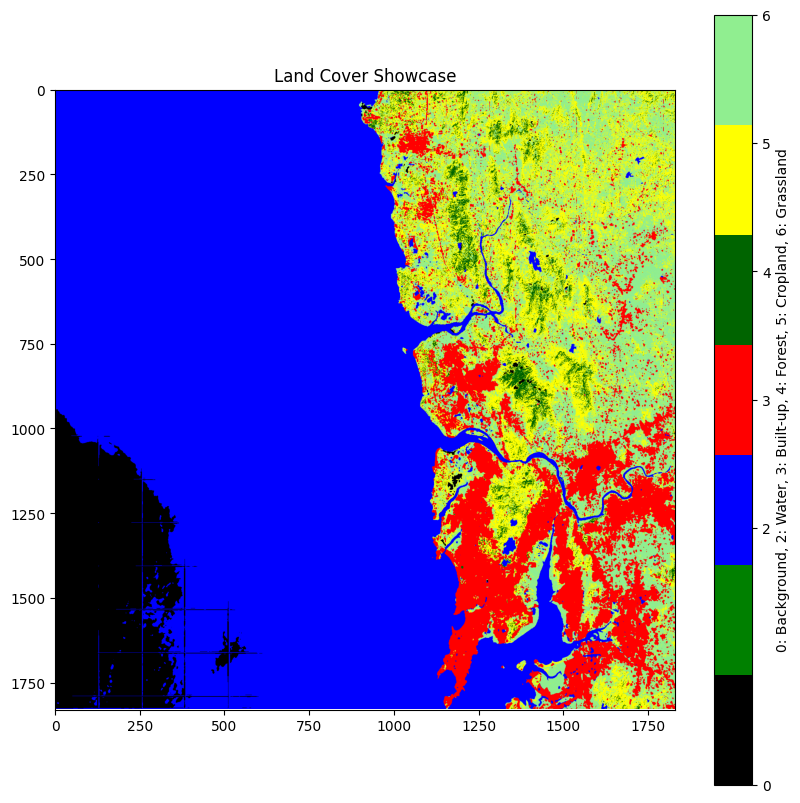

In [13]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
try:
    with rasterio.open(f"{out_dir}/veg_type.tif") as src:
        combined_mask = src.read(1)
    colors = ['black', 'green', 'blue', 'red', 'darkgreen', 'yellow', 'lightgreen']
    cmap = ListedColormap(colors[:7])
    plt.figure(figsize=(10, 10))
    plt.imshow(combined_mask, cmap=cmap, vmin=0, vmax=6)
    plt.colorbar(ticks=[0, 2, 3, 4, 5, 6], label='0: Background, 2: Water, 3: Built-up, 4: Forest, 5: Cropland, 6: Grassland')
    plt.title('Land Cover Showcase')
    plt.savefig(f"{out_dir}/land_cover_custom.png")
    plt.show
except Exception as e:
    print(f"Error visualizing mask: {e}")

In [11]:
import rasterio
import numpy as np
try:
    with rasterio.open("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/veg_type_mumbai.tif") as src:
        veg_type = src.read(1)
        print(f"Veg type shape: {veg_type.shape}, Classes: {np.unique(veg_type)}")
except Exception as e:
    print(f"Error reading veg type mask: {e}")

Veg type shape: (1830, 1830), Classes: [0 2 3]


In [12]:
import rasterio
import matplotlib.pyplot as plt
try:
    with rasterio.open("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/veg_type_mumbai.tif") as src:
        veg_type = src.read(1)
    plt.figure(figsize=(10, 10))
    plt.imshow(veg_type, cmap='viridis')
    plt.colorbar(label='0: None, 1: Forest, 2: Cropland, 3: Grassland')
    plt.title('Vegetation Types in Mumbai')
    plt.savefig("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/veg_type_mumbai.png")
    plt.close()
except Exception as e:
    print(f"Error visualizing veg type: {e}")

In [127]:
import rasterio
import numpy as np
try:
    with rasterio.open("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/NDVI_OUT/BRAZIL/AMAZON/seg_mask_AMA.tif") as src:
        mask = src.read(1)
        print(f"Seg mask shape: {mask.shape}, Classes: {np.unique(mask)}")
        print(f"Vegetation pixels (Class 1): {np.sum(mask == 1)}")
        print(f"Water pixels (Class 2): {np.sum(mask == 2)}")
        print(f"Built-up pixels (Class 3): {np.sum(mask == 3)}")
        print(f"Background pixels (Class 0): {np.sum(mask == 0)}")
except Exception as e:
    print(f"Error reading segmentation mask: {e}")

Seg mask shape: (1830, 1830), Classes: [0 1 2 3]
Vegetation pixels (Class 1): 3106105
Water pixels (Class 2): 71951
Built-up pixels (Class 3): 165969
Background pixels (Class 0): 4875


In [7]:
nir = mask_rgb[0, 7, :, :]  # Band 8 (NIR)
red = mask_rgb[0, 3, :, :]  # Band 4 (Red)
ndvi = (nir - red) / (nir + red + 1e-6)
plt.imshow(ndvi, cmap='RdYlGn')
plt.title("NDVI")
plt.show()

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [1]:
output_dir = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT"
from os import listdir
import numpy as np
import rasterio
print("Train images:", len(listdir(f"{output_dir}/train/images")))
print("Train masks:", len(listdir(f"{output_dir}/train/masks")))
print("Val images:", len(listdir(f"{output_dir}/val/images")))
print("Val masks:", len(listdir(f"{output_dir}/val/masks")))
class_counts = np.zeros(4)
for mask_path in listdir(f"{output_dir}/train/masks"):
    with rasterio.open(f"{output_dir}/train/masks/{mask_path}") as src:
        mask = src.read(1)
        for i in range(4):
            class_counts[i] += np.sum(mask == i)
print("Class counts:", class_counts)
print("Class ratios:", class_counts / class_counts.sum())
for img_path in [f"{output_dir}/train/images/{f}" for f in listdir(f"{output_dir}/train/images")[:5]]:
    with rasterio.open(img_path) as src:
        img = src.read()
        print(f"{img_path}: {img.shape[0]} bands")

Train images: 19540
Train masks: 19540
Val images: 5917
Val masks: 5917
Class counts: [2.82498410e+07 2.59383443e+08 2.67790860e+07 5.73099000e+06]
Class ratios: [0.08824122 0.81021029 0.08364717 0.01790132]
D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/train/images/ESA_WorldCover_10m_2021_V200_N09E078_Map_0_0_4104.tif: 13 bands
D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/train/images/ESA_WorldCover_10m_2021_V200_N09E078_Map_0_0_8127.tif: 13 bands
D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/train/images/ESA_WorldCover_10m_2021_V200_N09E078_Map_0_1024_3836.tif: 13 bands
D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/train/images/ESA_WorldCover_10m_2021_V200_N09E078_Map_0_1024_9250.tif: 13 bands
D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/train/images/ESA_WorldCover_10m_2021_V200_N09E078_Map_0_1088_6647.tif: 13 bands


In [9]:
import os
import glob
import logging
import rasterio
import numpy as np
import torch
from torch.nn import Module
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler("D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/process_log.txt"),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger()

# UNet model
class UNet(Module):
    def __init__(self, input_channels=13, num_classes=4):
        super(UNet, self).__init__()
        def conv_block(in_channels, out_channels):
            return torch.nn.Sequential(
                torch.nn.Conv2d(in_channels, out_channels, 3, padding=1),
                torch.nn.ReLU(inplace=True),
                torch.nn.Conv2d(out_channels, out_channels, 3, padding=1),
                torch.nn.ReLU(inplace=True)
            )
        def upsample_block(in_channels, out_channels):
            return torch.nn.ConvTranspose2d(in_channels, out_channels, 2, stride=2)
        self.conv1 = conv_block(input_channels, 64)
        self.pool1 = torch.nn.MaxPool2d(2)
        self.conv2 = conv_block(64, 128)
        self.pool2 = torch.nn.MaxPool2d(2)
        self.conv3 = conv_block(128, 256)
        self.pool3 = torch.nn.MaxPool2d(2)
        self.conv4 = conv_block(256, 512)
        self.pool4 = torch.nn.MaxPool2d(2)
        self.conv5 = conv_block(512, 1024)
        self.up6 = upsample_block(1024, 512)
        self.conv6 = conv_block(1024, 512)
        self.up7 = upsample_block(512, 256)
        self.conv7 = conv_block(512, 256)
        self.up8 = upsample_block(256, 128)
        self.conv8 = conv_block(256, 128)
        self.up9 = upsample_block(128, 64)
        self.conv9 = conv_block(128, 64)
        self.final_conv = torch.nn.Conv2d(64, num_classes, 1)

    def forward(self, x):
        x1 = self.conv1(x)
        p1 = self.pool1(x1)
        x2 = self.conv2(p1)
        p2 = self.pool2(x2)
        x3 = self.conv3(p2)
        p3 = self.pool3(x3)
        x4 = self.conv4(p3)
        p4 = self.pool4(x4)
        x5 = self.conv5(p4)
        u6 = self.up6(x5)
        x6 = torch.cat([u6, x4], dim=1)
        x6 = self.conv6(x6)
        u7 = self.up7(x6)
        x7 = torch.cat([u7, x3], dim=1)
        x7 = self.conv7(x7)
        u8 = self.up8(x7)
        x8 = torch.cat([u8, x2], dim=1)
        x8 = self.conv8(x8)
        u9 = self.up9(x8)
        x9 = torch.cat([u9, x1], dim=1)
        x9 = self.conv9(x9)
        return self.final_conv(x9)

# Segmentation function
def segment_image(image_path, output_mask_path, model_path="D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/CODE/ESA/unet_india_aus_10.pth"):
    try:
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        logger.info(f"Segmenting {image_path} using device: {device}")
        model = UNet(input_channels=13, num_classes=4).to(device)
        if not os.path.exists(model_path):
            logger.error(f"Model file not found: {model_path}")
            raise FileNotFoundError(f"Model file not found: {model_path}")
        model.load_state_dict(torch.load(model_path))
        model.eval()

        with rasterio.open(image_path) as src:
            img = src.read() / 10000.0
            img = np.clip(img, 0, 1)
            profile = src.profile
            logger.info(f"Image loaded: {image_path}, shape: {img.shape}, bands: {src.count}")
            if src.count != 13:
                logger.warning(f"Expected 13 bands, got {src.count}")

        patch_size = 128
        height, width = img.shape[1], img.shape[2]
        seg_mask = np.zeros((height, width), dtype=np.uint8)
        torch.cuda.empty_cache()
        for i in range(0, height, patch_size):
            for j in range(0, width, patch_size):
                h = min(patch_size, height - i)
                w = min(patch_size, width - j)
                patch = img[:, i:i+h, j:j+w]
                patch_padded = np.zeros((13, patch_size, patch_size), dtype=np.float32)
                patch_padded[:, :h, :w] = patch
                patch_tensor = torch.tensor(patch_padded, dtype=torch.float32).unsqueeze(0).to(device)
                with torch.no_grad():
                    output = model(patch_tensor)
                    pred = torch.argmax(output, dim=1).cpu().numpy()[0]
                seg_mask[i:i+h, j:j+w] = pred[:h, :w]

        os.makedirs(os.path.dirname(output_mask_path), exist_ok=True)
        profile.update(count=1, dtype=np.uint8)
        with rasterio.open(output_mask_path, "w", **profile) as dst:
            dst.write(seg_mask, 1)
        logger.info(f"Segmentation mask saved: {output_mask_path}")
        logger.info(f"Seg mask classes: {np.unique(seg_mask)}, Vegetation pixels: {np.sum(seg_mask == 1)}")
    except Exception as e:
        logger.error(f"Error segmenting {image_path}: {e}")
        raise

# NDVI calculation
def calculate_ndvi(image_path, output_ndvi_path):
    try:
        if not os.path.exists(image_path):
            logger.error(f"Image file not found: {image_path}")
            raise FileNotFoundError(f"Image file not found: {image_path}")
        with rasterio.open(image_path) as src:
            red = src.read(4).astype(float) / 10000.0  # Band 4 (Red)
            nir = src.read(8).astype(float) / 10000.0  # Band 8 (NIR)
            profile = src.profile
            logger.info(f"Image loaded for NDVI: {image_path}, shape: {red.shape}, bands: {src.count}")
            logger.info(f"Red range: [{red.min():.4f}, {red.max():.4f}], NIR range: [{nir.min():.4f}, {nir.max():.4f}]")
            if src.count < 8:
                logger.error(f"Image has {src.count} bands, expected at least 8")
                raise ValueError(f"Image has {src.count} bands, expected at least 8")

        np.seterr(divide='ignore', invalid='ignore')
        ndvi = (nir - red) / (nir + red)
        ndvi = np.clip(ndvi, -1, 1)
        logger.info(f"NDVI calculated for {image_path}, range: [{np.min(ndvi):.2f}, {np.max(ndvi):.2f}]")

        os.makedirs(os.path.dirname(output_ndvi_path), exist_ok=True)
        profile.update(count=1, dtype=np.float32)
        with rasterio.open(output_ndvi_path, "w", **profile) as dst:
            dst.write(ndvi, 1)
        logger.info(f"NDVI saved: {output_ndvi_path}")
    except Exception as e:
        logger.error(f"Error calculating NDVI for {image_path}: {e}")
        raise

# Vegetation type analysis
def analyze_vegetation_types(seg_mask_path, ndvi_path, output_veg_type_path):
    try:
        if not os.path.exists(seg_mask_path):
            logger.error(f"Segmentation mask not found: {seg_mask_path}")
            raise FileNotFoundError(f"Segmentation mask not found: {seg_mask_path}")
        with rasterio.open(seg_mask_path) as src:
            seg_mask = src.read(1)
            logger.info(f"Segmentation mask loaded: {seg_mask_path}, shape: {seg_mask.shape}, classes: {np.unique(seg_mask)}")
            logger.info(f"Vegetation pixels: {np.sum(seg_mask == 1)}, Water pixels: {np.sum(seg_mask == 2)}, Built-up pixels: {np.sum(seg_mask == 3)}, Background pixels: {np.sum(seg_mask == 0)}")

        if not os.path.exists(ndvi_path):
            logger.error(f"NDVI file not found: {ndvi_path}")
            raise FileNotFoundError(f"NDVI file not found: {ndvi_path}")
        with rasterio.open(ndvi_path) as src:
            ndvi = src.read(1)
            profile = src.profile
            logger.info(f"NDVI loaded: {ndvi_path}, shape: {ndvi.shape}, range: [{np.min(ndvi):.2f}, {np.max(ndvi):.2f}]")

        if seg_mask.shape != ndvi.shape:
            logger.error(f"Shape mismatch: seg_mask {seg_mask.shape}, ndvi {ndvi.shape}")
            raise ValueError(f"Shape mismatch: seg_mask {seg_mask.shape}, ndvi {ndvi.shape}")

        combined_mask = seg_mask.copy()
        veg_mask = (seg_mask == 1)
        logger.info(f"Vegetation pixels to classify: {np.sum(veg_mask)}")

        # Updated NDVI thresholds
        forest_ndvi = (ndvi >= 0.4) & (ndvi <= 0.9) & veg_mask
        cropland_ndvi = (ndvi >= 0.1) & (ndvi < 0.4) & veg_mask
        grassland_ndvi = (ndvi >= -1.0) & (ndvi < 0.1) & veg_mask

        combined_mask[veg_mask] = 0
        combined_mask[forest_ndvi] = 4
        combined_mask[cropland_ndvi] = 5
        combined_mask[grassland_ndvi] = 6
        logger.info(f"Vegetation types assigned: Forest={np.sum(combined_mask == 4)}, Cropland={np.sum(combined_mask == 5)}, Grassland={np.sum(combined_mask == 6)}")
        logger.info(f"Final classes: Background={np.sum(combined_mask == 0)}, Water={np.sum(combined_mask == 2)}, Built-up={np.sum(combined_mask == 3)}")

        pixel_area = 100  # 10m x 10m
        forest_area = np.sum(combined_mask == 4) * pixel_area / 10000
        cropland_area = np.sum(combined_mask == 5) * pixel_area / 10000
        grassland_area = np.sum(combined_mask == 6) * pixel_area / 10000
        water_area = np.sum(combined_mask == 2) * pixel_area / 10000
        builtup_area = np.sum(combined_mask == 3) * pixel_area / 10000
        logger.info(f"Forest area: {forest_area:.2f} ha")
        logger.info(f"Cropland area: {cropland_area:.2f} ha")
        logger.info(f"Grassland area: {grassland_area:.2f} ha")
        logger.info(f"Water area: {water_area:.2f} ha")
        logger.info(f"Built-up area: {builtup_area:.2f} ha")

        os.makedirs(os.path.dirname(output_veg_type_path), exist_ok=True)
        profile.update(count=1, dtype=np.uint8)
        with rasterio.open(output_veg_type_path, "w", **profile) as dst:
            dst.write(combined_mask, 1)
        logger.info(f"Combined mask saved: {output_veg_type_path}")

        colors = ['black', 'green', 'blue', 'red', 'darkgreen', 'yellow', 'lightgreen']
        cmap = ListedColormap(colors[:7])
        plt.figure(figsize=(10, 10))
        plt.imshow(combined_mask, cmap=cmap, vmin=0, vmax=6)
        plt.colorbar(ticks=[0, 2, 3, 4, 5, 6], label='0: Background, 2: Water, 3: Built-up, 4: Forest, 5: Cropland, 6: Grassland')
        plt.title(f'Land Cover for {os.path.basename(seg_mask_path)}')
        vis_path = output_veg_type_path.replace(".tif", ".png")
        plt.savefig(vis_path)
        plt.close()
        logger.info(f"Visualization saved: {vis_path}")
    except Exception as e:
        logger.error(f"Error analyzing vegetation for {seg_mask_path}: {e}")
        raise

# Main function to process all images
def process_images(input_folder, seg_output_folder, ndvi_output_folder):
    try:
        image_paths = glob.glob(os.path.join(input_folder, "*.tif"))
        logger.info(f"Found {len(image_paths)} images to process: {image_paths}")

        for image_path in image_paths:
            logger.info(f"Processing image: {image_path}")
            basename = os.path.basename(image_path).replace(".tif", "")

            seg_mask_path = os.path.join(seg_output_folder, f"seg_mask_{basename}.tif")
            ndvi_path = os.path.join(ndvi_output_folder, f"ndvi_{basename}.tif")
            veg_type_path = os.path.join(ndvi_output_folder, f"veg_type_{basename}.tif")

            if os.path.exists(seg_mask_path) and os.path.exists(ndvi_path) and os.path.exists(veg_type_path):
                logger.info(f"Outputs already exist for {basename}, skipping")
                continue

            try:
                if not os.path.exists(seg_mask_path):
                    segment_image(image_path, seg_mask_path)
                if not os.path.exists(ndvi_path):
                    calculate_ndvi(image_path, ndvi_path)
                if not os.path.exists(veg_type_path):
                    analyze_vegetation_types(seg_mask_path, ndvi_path, veg_type_path)
                logger.info(f"Completed processing for {basename}")
            except Exception as e:
                logger.error(f"Failed to process {image_path}: {e}")
                continue

    except Exception as e:
        logger.error(f"Error in process_images: {e}")
        raise

# Run the pipeline
if __name__ == "__main__":
    input_folder = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/Australia/Melbourne/"
    seg_output_folder = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/SEG_OUT/AUSTRALIA/MEL_NDVI/"
    ndvi_output_folder = "D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/OUTPUT/ESA_OUT/NDVI_OUT/AUSTRALIA/MEL_NDVI/"
    process_images(input_folder, seg_output_folder, ndvi_output_folder)

2025-04-20 19:10:31,349 - INFO - Found 2 images to process: ['D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/Australia/Melbourne\\M_TOP_L.tif', 'D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/Australia/Melbourne\\M_TOP_R.tif']
2025-04-20 19:10:31,349 - INFO - Processing image: D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/Australia/Melbourne\M_TOP_L.tif
2025-04-20 19:10:31,351 - INFO - Outputs already exist for M_TOP_L, skipping
2025-04-20 19:10:31,351 - INFO - Processing image: D:/Codes/Pycharm Projects/PBL/DATA PRE-PROCESSING/DATASET/S2_images/Australia/Melbourne\M_TOP_R.tif
2025-04-20 19:10:31,353 - INFO - Outputs already exist for M_TOP_R, skipping
